In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Carregando os dados

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

df = pd.concat([df1, df2], ignore_index=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Obtendo resumo da base

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Encontrando características que estão correlacionadas com 'survived' para ajudar  identificar quais variáveis têm relações fortes entre si.

In [4]:
numeric_df = df.select_dtypes(include=['number'])


correlation_series = abs(numeric_df.corr()["Survived"]).sort_values(ascending=False)

print(correlation_series)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


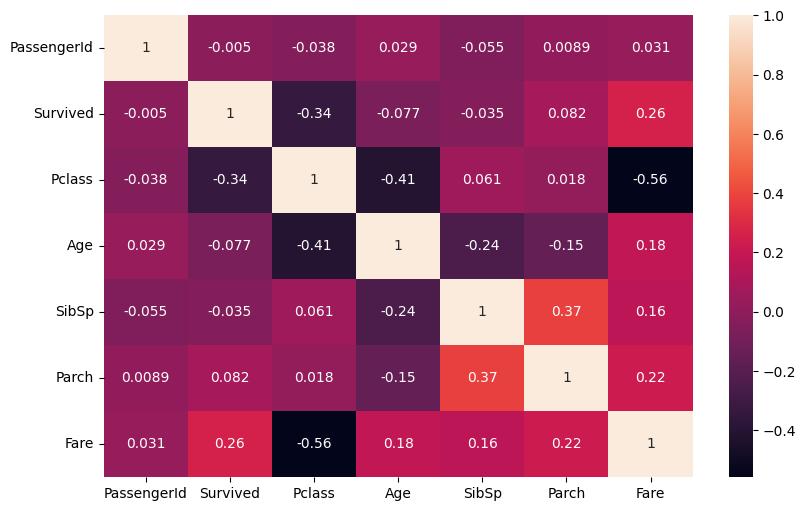

In [5]:
plt.figure(figsize=(9.5,6))
heatmap_series = sns.heatmap(numeric_df.corr(),annot=True);

PassengerId:

Correlações fracas com todas as variáveis: Os valores são próximos de 0, indicando que o PassengerId é apenas um identificador único e não tem relação com outras características.
Survived:

Pclass (-0.34): Correlação negativa moderada. Classe do passageiro está inversamente relacionada à sobrevivência; passageiros de classes mais altas tinham maior probabilidade de sobreviver.
Fare (0.26): Correlação positiva fraca. Passageiros que pagaram tarifas mais altas tinham uma ligeira vantagem em termos de sobrevivência.
Outras variáveis (Age, SibSp, Parch): Correlações fracas com sobrevivência.
Pclass:

Fare (-0.56): Correlação negativa forte. Passageiros de classes mais altas pagavam tarifas mais baixas.
Age (-0.41): Correlação negativa moderada. Passageiros de classes mais altas tendem a ser mais velhos.
Age:

Pclass (-0.41): Já discutido.
SibSp (-0.24): Correlação negativa fraca. Passageiros mais velhos tendem a viajar com menos irmãos ou cônjuges.
Parch (-0.15): Correlação negativa muito fraca. Passageiros mais velhos tendem a viajar com menos pais ou filhos.
SibSp e Parch:

Correlação entre si (0.37): Correlação positiva moderada. Passengers with many siblings/spouses tend to also have many parents/children traveling with them.
Fare:

Pclass (-0.56): Já discutido.
Outras variáveis: Correlações fracas com as demais variáveis.

Importância do Heatmap de Correlação
O heatmap de correlação é uma ferramenta visual poderosa para análise de dados. Ele facilita:

Identificação de Relações Significativas:

Ajuda a destacar quais variáveis têm relações significativas entre si.
É útil para identificar quais características são mais relevantes para um modelo preditivo.
Análise Exploratória de Dados (EDA):

O heatmap é uma maneira eficaz de resumir e comunicar rapidamente as relações entre variáveis durante a fase de EDA.
Seleção de Características (Feature Selection):

A visualização ajuda a decidir quais variáveis incluir ou excluir de um modelo de machine learning.
Pode revelar multicolinearidade, onde variáveis altamente correlacionadas podem ser redundantes.
Diagnóstico de Modelos:

Em modelos de regressão, o heatmap pode ajudar a detectar problemas de multicolinearidade.
Através deste heatmap, você pode deduzir que variáveis como Pclass e Fare têm uma influência notável na sobrevivência dos passageiros, enquanto outras como PassengerId não têm impacto.

Preparando dados e *Future Engineering*

Preenchendo os valores ausentes (NaN) na coluna "Fare"

In [6]:
df["Fare"].fillna(df.Fare[df["Pclass"] == 3].mean(), inplace = True)

<Axes: title={'center': 'Porto de embarque'}, xlabel='Embarked'>

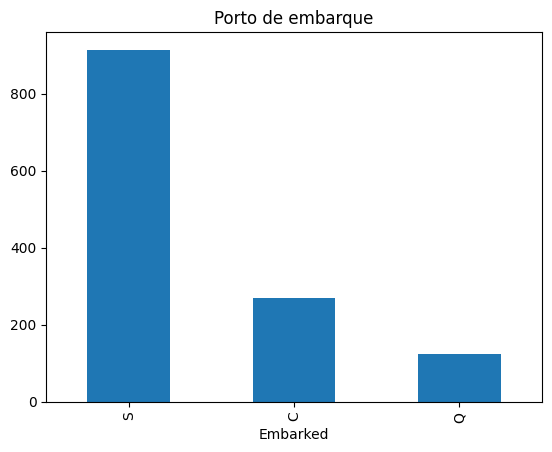

In [7]:
# histograma só é possível com valores numéricos, mas Embarked é categórico
df['Embarked'].value_counts().plot(kind='bar', title='Porto de embarque')

Observa-se que Southampton é o porto de embarque mais comum nos dados, vamos usar o valor mais comum para preencher valores ausentes em uma tentativa de minimizar a introdução de viés nos dados.

In [8]:
df["Embarked"].fillna("S", inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Segmentando os passageiros e entender melhor quem estava a bordo

In [9]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.",expand = False)
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

## Padronizar os títulos na coluna title



*   "Ms","Mlle" = "Miss"(mulheres solteiras)
*   "Mme","Countess","Lady","Dona" = "Mrs"(mulheres casadas)
*   "Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don" = ,"Mr"(homens)

Essa padronização dos títulos pode ser útil para simplificar a análise e categorização dos passageiros com base em seu status civil ou posição social.









In [10]:
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")

df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")

df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")

Em relação a idade posso remover os valores nulos diretamente ou calcular a mediana e a média, vou optar por calcular a mediana e a média.

29.881137667304014
28.0


Text(0.5, 1.0, 'Idade')

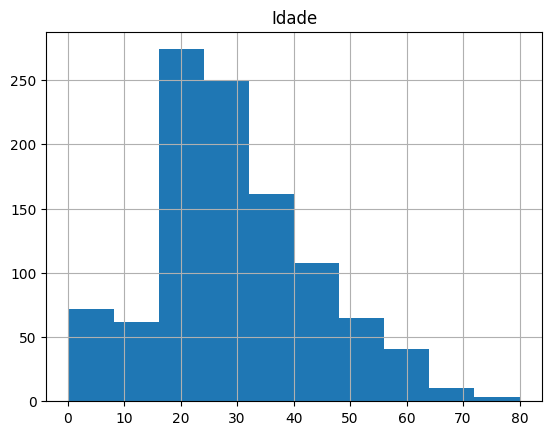

In [11]:
media_idade = df['Age'].mean()
mediana_idade = df['Age'].median()

print(media_idade)
print(mediana_idade)

df['Age'].hist()
plt.title('Idade')

* A média e a mediana resultou muito próxima, portanto vou optar por trocar os nulos pela média e depois gerar um novo histograma de idades.

* Também vou criar uma nova coluna chamada "Older" no dataframe df. Esta coluna terá o valor 1 se a idade da pessoa for maior do que 66 anos e 0 caso contrário. Assim, está marcando as pessoas com mais de 66 anos como "Older".

Abaixo a série de idades que foram preenchidas usando a mediana das idades agrupadas pelo título da pessoa.

In [12]:
df["Senior"] = df["Age"].map(lambda s:1 if s > 66 else 0)

df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace = True)
df.groupby("Title")["Age"].transform("median")

0       30.0
1       35.5
2       22.0
3       35.5
4       30.0
        ... 
1304    30.0
1305    35.5
1306    30.0
1307    30.0
1308     4.0
Name: Age, Length: 1309, dtype: float64

Como observado acima, temos 1309 registros no total. As colunas Age, Cabin e Embarked são as que possuem valores nulos, porém Cabin é o pior, pois possui 1014 dados nulos, e essa informação pode não ser tão útil. **Portanto vou remover a coluna permanentemente.**


In [13]:
del df["Cabin"]

Criando nova coluna "Family" que contém o número total de membros da família de cada passageiro, incluindo o próprio passageiro, para análises relacionadas ao tamanho da família a bordo do Titanic.

In [14]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

Categorizando passageiros por faixas etárias

In [15]:
df['Kid'] = np.where(df['Age']<15,1,0)
df['Young'] = np.where((df.Age > 14) & (df.Age < 25),1,0)
df['Adult'] = np.where((df.Age > 24) & (df.Age < 67),1,0)

Removendo passengerID e ticket para simplificar

In [16]:
df.drop(["PassengerId","Ticket"], axis = 1, inplace = True)

Criando quatro novas colunas no dataframe df: "Single", "Small", "Medium" e "Large, para classificar os passageiros com base no tamanho de suas famílias.

df["Single"] = np.where(df.Family < 2,1,0): Esta linha atribui o valor 1 à coluna "Single" para passageiros com menos de 2 membros na família (incluindo eles mesmos) e o valor 0 para os outros, com o propósito de indicar se um passageiro está viajando sozinho.

df["Small"] = np.where((df.Family > 1) & (df.Family < 5),1,0): Esta linha atribui o valor 1 à coluna "Small" para passageiros com 2 a 4 membros na família (incluindo eles mesmos) e o valor 0 para os outros. Ou seja, esta coluna indica se um passageiro está em uma família pequena.

df["Medium"] = np.where((df.Family > 4) & (df.Family < 7),1,0): Esta linha atribui o valor 1 à coluna "Medium" para passageiros com 5 a 6 membros na família (incluindo eles mesmos) e o valor 0 para os outros. Ou seja, esta coluna indica se um passageiro está em uma família de tamanho médio.

df["Large"] = np.where(df.Family > 6,1,0): Esta linha atribui o valor 1 à coluna "Large" para passageiros com mais de 6 membros na família (incluindo eles mesmos) e o valor 0 para os outros. Ou seja, esta coluna indica se um passageiro está em uma família grande.

Essas colunas podem ser úteis para análises que levam em consideração o tamanho da família dos passageiros, como a probabilidade de sobrevivência ou a distribuição de grupos demográficos a bordo.

In [17]:
df["Single"] = np.where(df.Family < 2,1,0)
df["Small"] = np.where((df.Family > 1) & (df.Family < 5),1,0)
df["Medium"] = np.where((df.Family > 4) & (df.Family < 7),1,0)
df["Large"] = np.where(df.Family > 6,1,0)

Nossa Base atualmente

In [18]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0,2,0,1,0,0,1,0,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,2,0,0,1,0,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,1,0,0,1,1,0,0,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,2,0,0,1,0,1,0,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Mrs,0,1,0,0,1,1,0,0,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr,0,1,0,0,1,1,0,0,0
1307,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0


convertendo a coluna "Pclass" para o tipo de dado categórico e "Sex" para boolean

In [19]:
df["Pclass"] = df["Pclass"].astype("category")
df.Sex = df["Sex"].replace(["female"], 1)
df.Sex = df["Sex"].replace(["male"], 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   int64   
 4   Age       1309 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Fare      1309 non-null   float64 
 8   Embarked  1309 non-null   object  
 9   Title     1309 non-null   object  
 10  Senior    1309 non-null   int64   
 11  Family    1309 non-null   int64   
 12  Kid       1309 non-null   int64   
 13  Young     1309 non-null   int64   
 14  Adult     1309 non-null   int64   
 15  Single    1309 non-null   int64   
 16  Small     1309 non-null   int64   
 17  Medium    1309 non-null   int64   
 18  Large     1309 non-null   int64   
dtypes: category(1), float64(3), int64(12), object(3)

Criando colulnas para mulheres da classe 1 e 3, colunas para mulheres adultas e homens adultos

In [20]:
df["P1f"] = np.where((df.Pclass == 1) & (df.Sex == 1), 1, 0)
df["P2f"] = np.where((df.Pclass == 2) & (df.Sex == 1), 1, 0)
df["P3f"] = np.where((df.Pclass == 3) & (df.Sex == 1), 1, 0)
df["AdultWomen"] = np.where((df.Age > 24) & (df.Age < 67) & (df.Sex == 1), 1, 0)
df["AdultMen"] = np.where((df.Age > 24) & (df.Age < 67) & (df.Sex == 0), 1, 0)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P2f,P3f,AdultWomen,AdultMen
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr,0,2,0,1,0,0,1,0,0,0,0,0,0,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs,0,2,0,0,1,0,1,0,0,1,0,0,1,0
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss,0,1,0,0,1,1,0,0,0,0,0,1,1,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs,0,2,0,0,1,0,1,0,0,1,0,0,1,0
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",0,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,0,1
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C,Mrs,0,1,0,0,1,1,0,0,0,1,0,0,1,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,0,1
1307,NaN,3,"Ware, Mr. Frederick",0,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   category
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   int64   
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Fare        1309 non-null   float64 
 8   Embarked    1309 non-null   object  
 9   Title       1309 non-null   object  
 10  Senior      1309 non-null   int64   
 11  Family      1309 non-null   int64   
 12  Kid         1309 non-null   int64   
 13  Young       1309 non-null   int64   
 14  Adult       1309 non-null   int64   
 15  Single      1309 non-null   int64   
 16  Small       1309 non-null   int64   
 17  Medium      1309 non-null   int64   
 18  Large       1309 non-null   int64   
 19  P1f   

Removendo a coluna name pois não será útil e salvando a base tratada

In [22]:
df.drop("Name",axis=1,inplace=True)

In [23]:
df.to_csv('dados_tratados.csv', index=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   category
 2   Sex         1309 non-null   int64   
 3   Age         1309 non-null   float64 
 4   SibSp       1309 non-null   int64   
 5   Parch       1309 non-null   int64   
 6   Fare        1309 non-null   float64 
 7   Embarked    1309 non-null   object  
 8   Title       1309 non-null   object  
 9   Senior      1309 non-null   int64   
 10  Family      1309 non-null   int64   
 11  Kid         1309 non-null   int64   
 12  Young       1309 non-null   int64   
 13  Adult       1309 non-null   int64   
 14  Single      1309 non-null   int64   
 15  Small       1309 non-null   int64   
 16  Medium      1309 non-null   int64   
 17  Large       1309 non-null   int64   
 18  P1f         1309 non-null   int64   
 19  P2f   

Dividindo em treinamento e teste

In [25]:
df_dummies = pd.get_dummies(df, drop_first = True)

df_train = df_dummies[:891]
df_test = df_dummies[891:]

#defininindo caracteristicas
x=df_train.drop("Survived",axis=1)

#definindo alvo
y=df_train["Survived"]

X_test = df_test.drop("Survived",axis=1)


print("X_train: ", x.shape)
print("y_train: ", y.shape)
print("X_test: ",   X_test.shape)


X_train:  (891, 26)
y_train:  (891,)
X_test:  (418, 26)


In [26]:
df_dummies = pd.get_dummies(df, drop_first = True)

df_train = df_dummies[:891]
df_test = df_dummies[891:]

#defininindo caracteristicas
X_train =df_train.drop("Survived",axis=1)

#definindo alvo
y_train=df_train["Survived"]



print("X_train: ", x.shape)
print("y_train: ", y.shape)
print("X_test: ",   X_test.shape)

X_train:  (891, 26)
y_train:  (891,)
X_test:  (418, 26)


In [27]:
print("X_test: ",   X_test.shape)

X_test:  (418, 26)


In [29]:
x.head()


,Sex,Age,SibSp,Parch,Fare,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P2f,P3f,AdultWomen,AdultMen,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0,22.0,1,0,7.2500,0,2,0,1,0,0,1,0,0,0,0,0,0,0,False,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,0,2,0,0,1,0,1,0,0,1,0,0,1,0,False,False,False,False,False,False,True
2,1,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,0,0,1,1,0,False,True,False,True,True,False,False
3,1,35.0,1,0,53.1000,0,2,0,0,1,0,1,0,0,1,0,0,1,0,False,False,False,True,False,False,True
4,0,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,0,0,0,0,1,False,True,False,True,False,True,False


In [30]:
x.shape,y.shape

((891, 26), (891,))

Criando Modelo de Rede Neural

In [31]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [32]:
# model=Sequential()
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(1,activation="sigmoid"))
# Criar o modelo com regularização
# Criar o modelo com regularização ajustada
# model = Sequential()
# model.add(Dense(19, activation='relu', input_dim=x.shape[1]))
# model.add(Dropout(0.2))  # Reduzindo o Dropout
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=x.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential()
# model.add(Dense(32, activation="relu", input_dim=X_train.shape[1],))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(16, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))


In [33]:
# model=Sequential()
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(19,activation="relu"))
# model.add(Dense(1,activation="sigmoid"))
# Criar o modelo com regularização
# Criar o modelo com regularização ajustada
# model = Sequential()
# model.add(Dense(19, activation='relu', input_dim=x.shape[1]))
# model.add(Dropout(0.2))  # Reduzindo o Dropout
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(19, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=x.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(x.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [34]:
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
optimizer = Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
x.shape,y.shape

((891, 26), (891,))

Treinando Modelo

In [36]:
from sklearn.model_selection import train_test_split
x = x.astype('float32')
y = y.astype('float32')
# Supondo que 'x' e 'y' são suas features e labels
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:


# # Treinar o modelo com Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# history = model.fit(x, y, epochs=250, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])
# Callbacks para ajuste dinâmico da taxa de aprendizado e early stopping
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, min_lr=0.0001)
#early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Treinar o modelo com Early Stopping ajustado
# history = model.fit(x, y, epochs=250, batch_size=32, verbose=1, validation_split=0.3, callbacks=[early_stopping, reduce_lr])
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_val, y_val))


# history = model.fit(x,y,epochs=250,batch_size=10,verbose=1)

Epoch 1/500
23/23 [==============================] - 2s 14ms/step - loss: 1.6135 - accuracy: 0.5843 - val_loss: 0.6942 - val_accuracy: 0.6760
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.8467 - accuracy: 0.6025 - val_loss: 0.5807 - val_accuracy: 0.6927
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.7264 - accuracy: 0.6433 - val_loss: 0.5682 - val_accuracy: 0.7318
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6531 - val_loss: 0.5697 - val_accuracy: 0.7151
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6587 - val_loss: 0.5992 - val_accuracy: 0.6480
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.6728 - val_loss: 0.5359 - val_accuracy: 0.6816
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.6713 - val_loss: 0.5567 - val_accuracy: 0.7318
Epoch 8/500


In [38]:
scores=model.evaluate(x,y)
print("%s:%.2r%%" % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8519
accuracy:85%


In [39]:
print(X_val)

     Sex   Age  SibSp  Parch       Fare  Senior  Family  Kid  Young  Adult  \
709  0.0   4.0    1.0    1.0  15.245800     0.0     3.0  1.0    0.0    0.0   
439  0.0  31.0    0.0    0.0  10.500000     0.0     1.0  0.0    0.0    1.0   
840  0.0  20.0    0.0    0.0   7.925000     0.0     1.0  0.0    1.0    0.0   
720  1.0   6.0    0.0    1.0  33.000000     0.0     2.0  1.0    0.0    0.0   
39   1.0  14.0    1.0    0.0  11.241700     0.0     2.0  1.0    0.0    0.0   
..   ...   ...    ...    ...        ...     ...     ...  ...    ...    ...   
433  0.0  17.0    0.0    0.0   7.125000     0.0     1.0  0.0    1.0    0.0   
773  0.0  30.0    0.0    0.0   7.225000     0.0     1.0  0.0    0.0    1.0   
25   1.0  38.0    1.0    5.0  31.387501     0.0     7.0  0.0    0.0    1.0   
84   1.0  17.0    0.0    0.0  10.500000     0.0     1.0  0.0    1.0    0.0   
10   1.0   4.0    1.0    1.0  16.700001     0.0     3.0  1.0    0.0    0.0   

     Single  Small  Medium  Large  P1f  P2f  P3f  AdultWomen  A

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Acurácia

Salvando modelo

In [41]:
model.save('modelo_titanicFinalFinal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
X_test = X_test.astype('float32')

y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > 0.5).astype(int).reshape(-1)

14/14 [==============================] - 0s 2ms/step


Matrix de confusão e métricas de avaliação do modelo

28/28 [==============================] - 0s 2ms/step
Acurácia no Dataset de Treinamento: 0.8518518518518519 

28/28 [==============================] - 0s 2ms/step


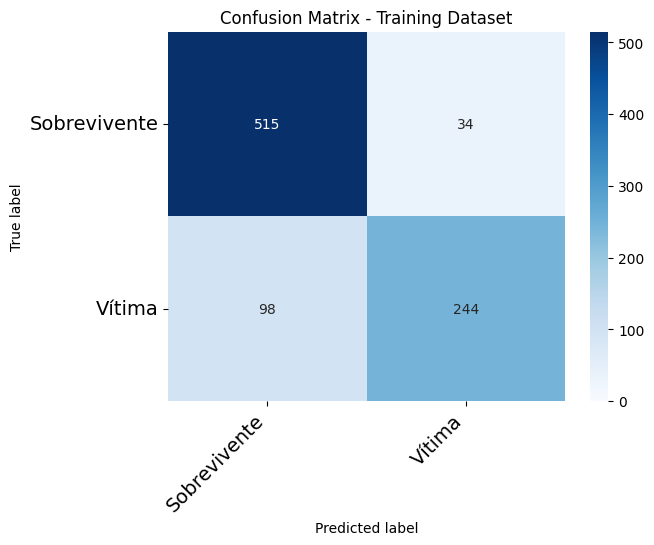

6/6 [==============================] - 0s 3ms/step
Acurácia no Dataset de Validação: 0.8212290502793296 

6/6 [==============================] - 0s 3ms/step


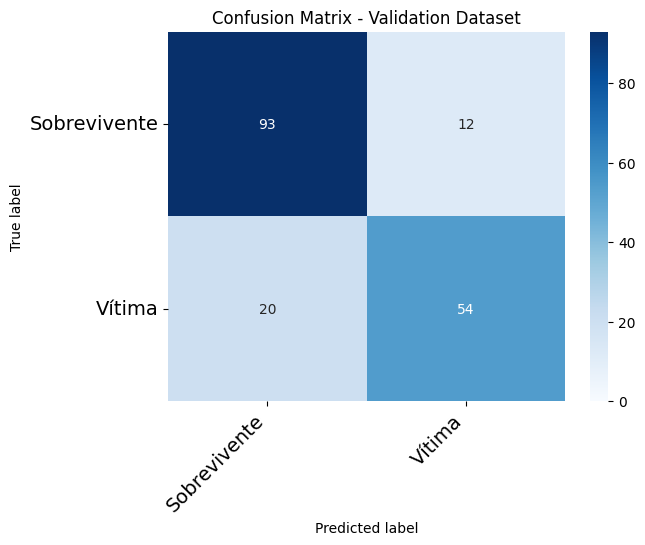

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
y_train = y
X_train = x
# Acurácia no Dataset de Treinamento
train_accuracy = accuracy_score(y_train.values, np.round(model.predict(X_train)))
print("Acurácia no Dataset de Treinamento:", train_accuracy, "\r\n")

# Matriz de Confusão para o Dataset de Treinamento
confusionMatrixDF_train = pd.DataFrame(confusion_matrix(y_train.values, np.round(model.predict(X_train))),
                                       index=('Sobrevivente', 'Vítima'), columns=('Sobrevivente', 'Vítima'))

heatmap_train = sns.heatmap(confusionMatrixDF_train, annot=True, fmt="d", cmap="Blues", vmin=0)
heatmap_train.yaxis.set_ticklabels(heatmap_train.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap_train.xaxis.set_ticklabels(heatmap_train.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training Dataset')
plt.show()

# Acurácia no Dataset de Validação
val_accuracy = accuracy_score(y_val.values, np.round(model.predict(X_val)))
print("Acurácia no Dataset de Validação:", val_accuracy, "\r\n")

# Matriz de Confusão para o Dataset de Validação
confusionMatrixDF_val = pd.DataFrame(confusion_matrix(y_val.values, np.round(model.predict(X_val))),
                                     index=('Sobrevivente', 'Vítima'), columns=('Sobrevivente', 'Vítima'))

heatmap_val = sns.heatmap(confusionMatrixDF_val, annot=True, fmt="d", cmap="Blues", vmin=0)
heatmap_val.yaxis.set_ticklabels(heatmap_val.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap_val.xaxis.set_ticklabels(heatmap_val.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation Dataset')
plt.show()


Mais métricas de avaliação

In [44]:
from sklearn.metrics import classification_report

# Relatório de Classificação para o Dataset de Treinamento
print("Relatório de Classificação para o Dataset de Treinamento:")
print(classification_report(y_train.values, np.round(model.predict(X_train))))

# Relatório de Classificação para o Dataset de Validação
print("Relatório de Classificação para o Dataset de Validação:")
print(classification_report(y_val.values, np.round(model.predict(X_val))))

Relatório de Classificação para o Dataset de Treinamento:
28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       549
         1.0       0.88      0.71      0.79       342

    accuracy                           0.85       891
   macro avg       0.86      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891

Relatório de Classificação para o Dataset de Validação:
6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       105
         1.0       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



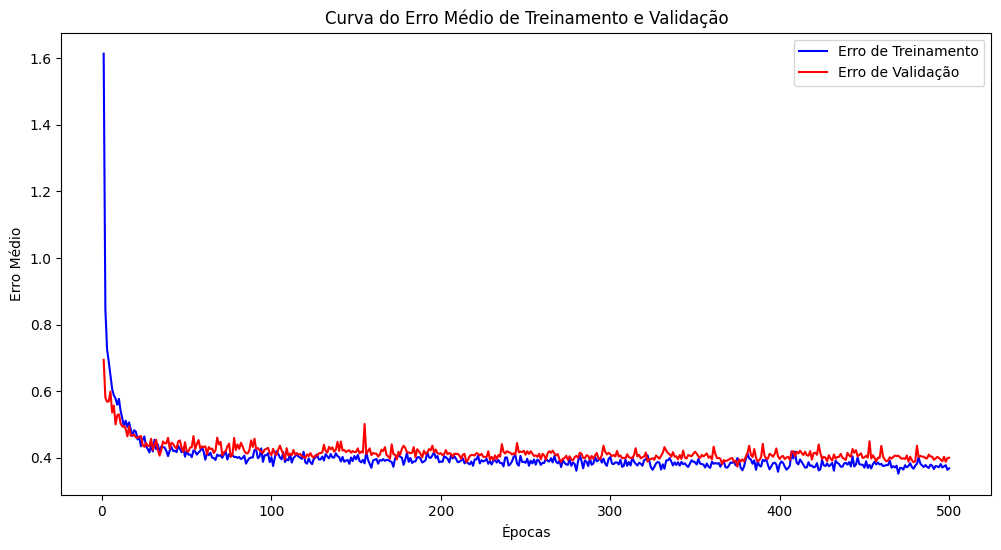

In [45]:
import matplotlib.pyplot as plt

# Extrair a perda (erro) do histórico de treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Criar uma lista com o número de épocas
epochs = range(1, len(train_loss) + 1)

# Plotar a perda de treinamento e validação
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b-', label='Erro de Treinamento')
plt.plot(epochs, val_loss, 'r-', label='Erro de Validação')
plt.title('Curva do Erro Médio de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()


In [46]:
import pandas as pd

# Convertendo as previsões em uma coluna Survived e adicionando ao DataFrame de teste
X_test['Survived_Predicted'] = y_pred_test

# Exibindo o DataFrame de teste com a coluna de sobrevivência prevista adicionada
print(X_test)

      Sex   Age  SibSp  Parch        Fare  Senior  Family  Kid  Young  Adult  \
891   0.0  34.5    0.0    0.0    7.829200     0.0     1.0  0.0    0.0    1.0   
892   1.0  47.0    1.0    0.0    7.000000     0.0     2.0  0.0    0.0    1.0   
893   0.0  62.0    0.0    0.0    9.687500     0.0     1.0  0.0    0.0    1.0   
894   0.0  27.0    0.0    0.0    8.662500     0.0     1.0  0.0    0.0    1.0   
895   1.0  22.0    1.0    1.0   12.287500     0.0     3.0  0.0    1.0    0.0   
...   ...   ...    ...    ...         ...     ...     ...  ...    ...    ...   
1304  0.0  30.0    0.0    0.0    8.050000     0.0     1.0  0.0    0.0    1.0   
1305  1.0  39.0    0.0    0.0  108.900002     0.0     1.0  0.0    0.0    1.0   
1306  0.0  38.5    0.0    0.0    7.250000     0.0     1.0  0.0    0.0    1.0   
1307  0.0  30.0    0.0    0.0    8.050000     0.0     1.0  0.0    0.0    1.0   
1308  0.0   4.0    1.0    1.0   22.358299     0.0     3.0  1.0    0.0    0.0   

      Single  Small  Medium  Large  P1f

In [47]:
# Especifique o caminho e o nome do arquivo CSV onde você deseja salvar o DataFrame
caminho_arquivo = 'X_test_com_previsao.csv'

# Salve o DataFrame X_test com a nova coluna adicionada em um arquivo CSV
X_test.to_csv(caminho_arquivo, index=False)

In [48]:
df3 = pd.read_csv("X_test_com_previsao.csv")

df3.head()

,Sex,Age,SibSp,Parch,Fare,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P2f,P3f,AdultWomen,AdultMen,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Survived_Predicted
0,0.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,1.0,47.0,1.0,0.0,7.0000,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,1.0,22.0,1.0,1.0,12.2875,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1


In [49]:
predicted_survival_mean = df3.groupby([ 'Kid', 'Young', 'Adult', 'Single', 'Small', 'Medium', 'Large', 'P1f', 'P2f', 'P3f', 'AdultWomen', 'AdultMen'])['Survived_Predicted'].mean().reset_index()


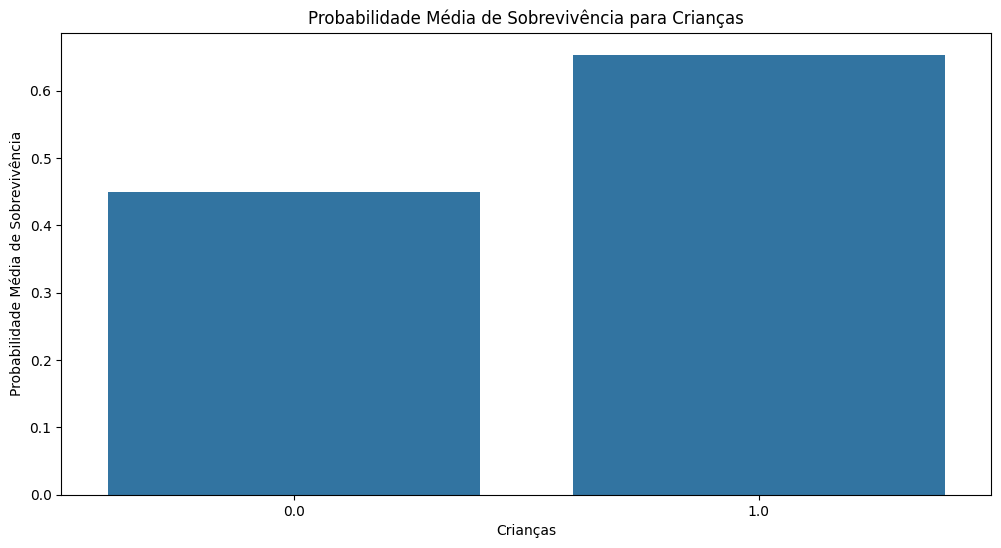

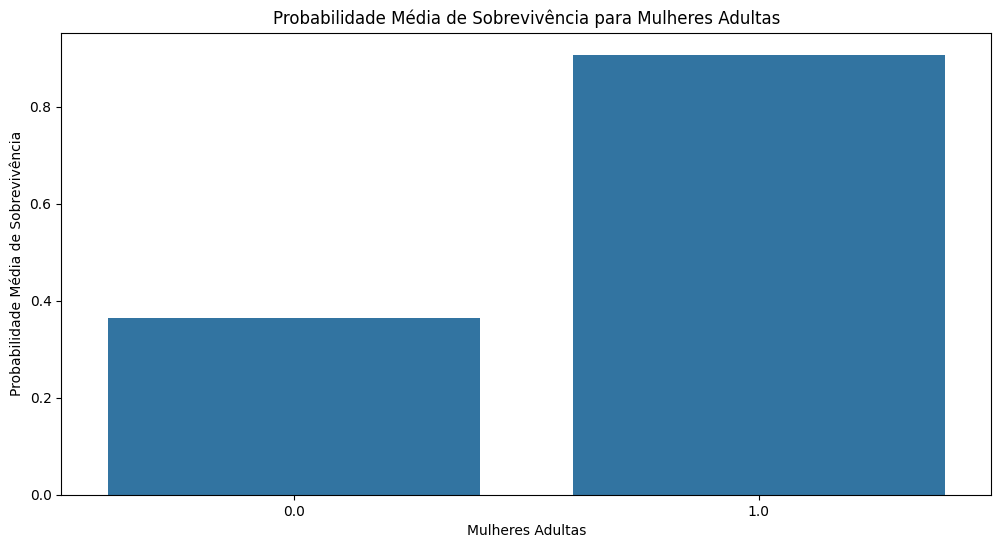

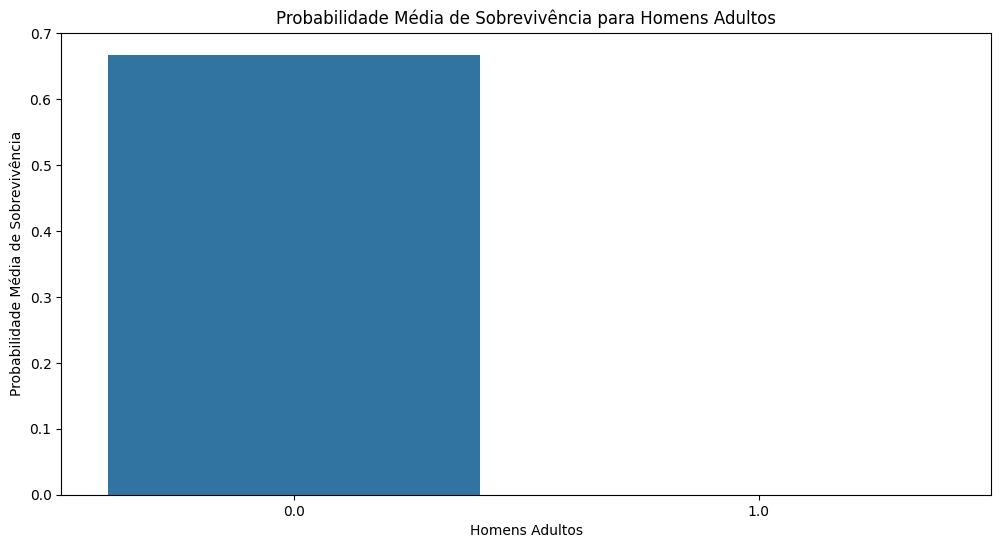

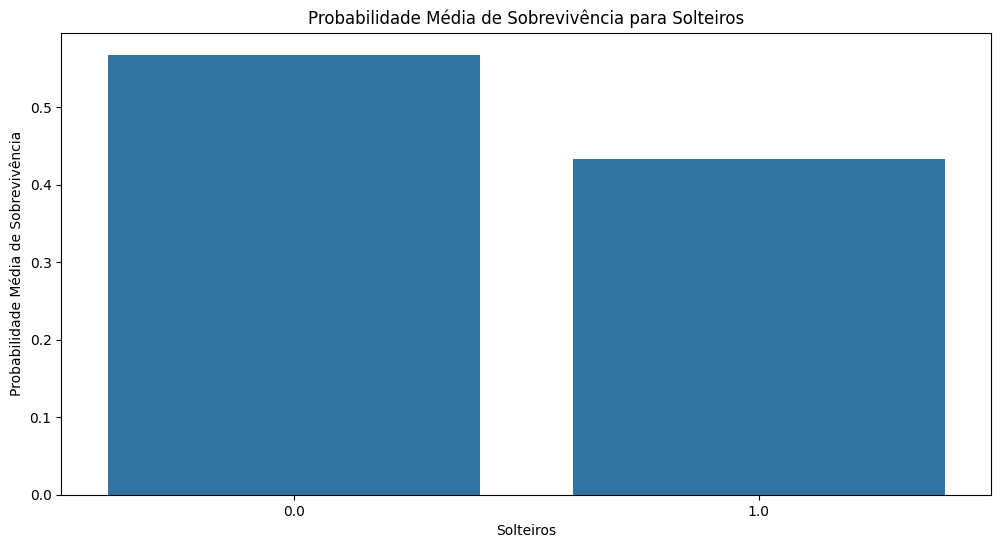

In [51]:
# Agrupar por grupos de interesse
predicted_survival_mean_groups = df3.groupby(['Kid', 'AdultWomen', 'AdultMen', 'Single'])['Survived_Predicted'].mean().reset_index()

# Visualizando por grupos de interesse
plt.figure(figsize=(12, 6))
sns.barplot(data=predicted_survival_mean_groups, x='Kid', y='Survived_Predicted', errorbar=None)
plt.title('Probabilidade Média de Sobrevivência para Crianças')
plt.ylabel('Probabilidade Média de Sobrevivência')
plt.xlabel('Crianças')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=predicted_survival_mean_groups, x='AdultWomen', y='Survived_Predicted', errorbar=None)
plt.title('Probabilidade Média de Sobrevivência para Mulheres Adultas')
plt.ylabel('Probabilidade Média de Sobrevivência')
plt.xlabel('Mulheres Adultas')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=predicted_survival_mean_groups, x='AdultMen', y='Survived_Predicted', errorbar=None)
plt.title('Probabilidade Média de Sobrevivência para Homens Adultos')
plt.ylabel('Probabilidade Média de Sobrevivência')
plt.xlabel('Homens Adultos')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=predicted_survival_mean_groups, x='Single', y='Survived_Predicted', errorbar=None)
plt.title('Probabilidade Média de Sobrevivência para Solteiros')
plt.ylabel('Probabilidade Média de Sobrevivência')
plt.xlabel('Solteiros')
plt.show()


In [52]:
maior_chance_sobreviver = predicted_survival_mean.loc[predicted_survival_mean['Survived_Predicted'].idxmax()]
print("Grupo com maior probabilidade de sobreviver:")
print(maior_chance_sobreviver)

Grupo com maior probabilidade de sobreviver:
Kid                   0.0
Young                 0.0
Adult                 0.0
Single                0.0
Small                 1.0
Medium                0.0
Large                 0.0
P1f                   0.0
P2f                   0.0
P3f                   0.0
AdultWomen            0.0
AdultMen              0.0
Survived_Predicted    1.0
Name: 0, dtype: float64


In [53]:
# Agrupar os dados por cada categoria e calcular a média das previsões de sobrevivência para cada categoria
predicted_survival_mean = df3.groupby(['Age','Family', 'Kid', 'Young', 'Adult', 'Single', 'Small', 'Medium', 'Large', 'P1f', 'P2f', 'P3f', 'AdultWomen', 'AdultMen'])['Survived_Predicted'].mean()

# Determinar quem tem a maior probabilidade de sobreviver
maior_chance_sobreviver = predicted_survival_mean.idxmax()

# Exibir o grupo com maior probabilidade de sobreviver
print("Grupo com maior probabilidade de sobreviver:")
print(maior_chance_sobreviver)

Grupo com maior probabilidade de sobreviver:
(0.17, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)


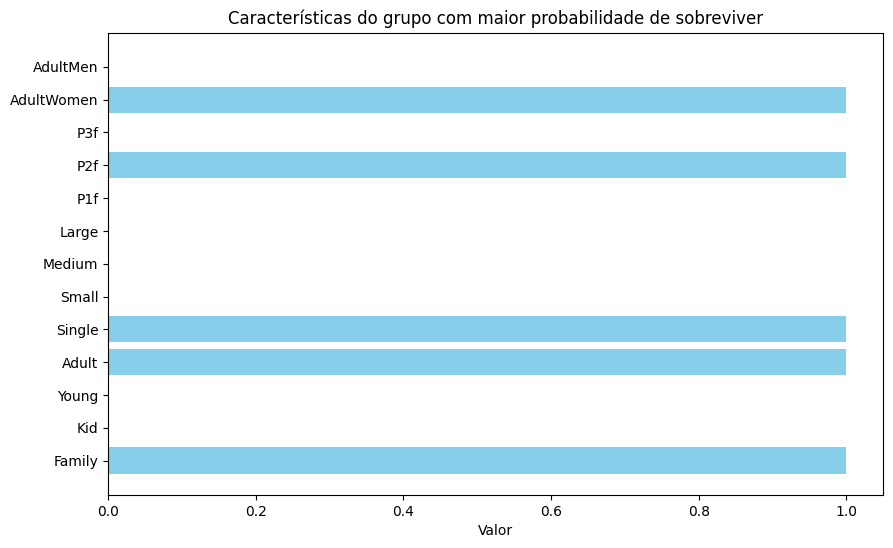

In [55]:
import matplotlib.pyplot as plt

# Características do grupo com maior probabilidade de sobreviver
caracteristicas = {
    'Family': 1,
    'Kid': 0,
    'Young': 0,
    'Adult': 1,
    'Single': 1,
    'Small': 0,
    'Medium': 0,
    'Large': 0,
    'P1f': 0,
    'P2f': 1,
    'P3f': 0,
    'AdultWomen': 1,
    'AdultMen': 0
}

# Criar gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(list(caracteristicas.keys()), list(caracteristicas.values()), color='skyblue')
plt.xlabel('Valor')
plt.title('Características do grupo com maior probabilidade de sobreviver')
plt.show()